Data shape after cleaning: (10000, 10)
AK: {'Pizza Hut', 'Regal Cinemas Tikahtnu  16 IMAX & RPX', "Wendy's", "Domino's Pizza", "Carl's Jr", 'Subway', "Arby's", 'McDonalds', "McDonald's"}
AL: {'Krystal', "Popeye's Chicken", 'Burger King', 'Waffle House', 'Chick-fil-a', "Wendy's", 'Steak-out', 'Kfc', 'Whataburger', "Mc Donald's", 'KFC', 'Pizza Hut', 'Dominos Pizza', 'Taco Bell', 'SONIC Drive In', 'Sonic Drive-In', "Church's Chicken", "McDonald's", 'Five Guys', "Hardee's / Red Burrito", "Bojangles' Famous Chicken 'n Biscuits", "Mcdonald's", "Hardee's", "Jimmy John's", "Jack's", 'Subway', 'Chick-Fil-A', "Popeye's Chicken & Biscuits", 'SUBWAY', 'Chick-fil-A', 'Bravo Tacos', "Milo's Hamburgers", "Captain D's", "Arby's", 'McDonalds', 'Checkers', 'Quiznos'}
AR: {"Cody's Cafe", 'Burger King', "Wendy's", 'Popeyes Louisiana Kitchen', 'Whataburger', "Rally's", 'Steak Escape', 'Sonic Drive In', 'KFC', 'Pizza Hut', 'Taco Bell', "Domino's Pizza", 'SONIC Drive In', "Steak 'n Shake", 'Sonic Drive-In', 

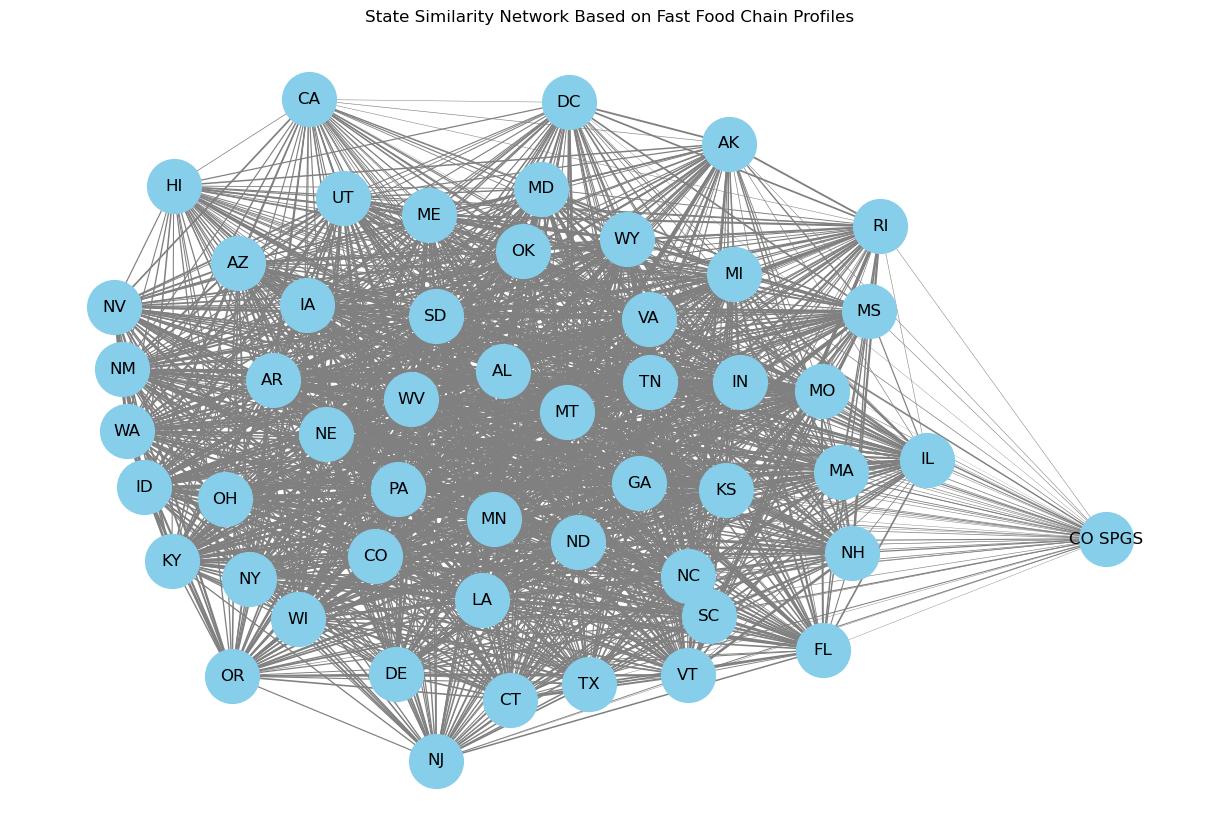

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("FastFoodRestaurants_cleaned.csv")
print("Data shape after cleaning:", df.shape)


state_chains = df.groupby("province")["name"].apply(lambda x: set(x)).to_dict()

# Print a sample of the state_chains dictionary to inspect
for state, chains in list(state_chains.items())[:5]:
    print(f"{state}: {chains}")


def jaccard_similarity(set1, set2):
    if not set1 or not set2:
        return 0
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union


G = nx.Graph()


for state, chains in state_chains.items():
    G.add_node(state, chains=chains)


states = list(state_chains.keys())


for i in range(len(states)):
    for j in range(i + 1, len(states)):
        state1 = states[i]
        state2 = states[j]
        sim = jaccard_similarity(state_chains[state1], state_chains[state2])
        # Only add an edge if there is some similarity (non-zero)
        if sim > 0:
            G.add_edge(state1, state2, weight=sim)


weighted_degree = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True))
                   for node in G.nodes()}

print("\nWeighted degree for each state:")
for state, wd in weighted_degree.items():
    print(f"{state}: {wd:.3f}")


top3 = sorted(weighted_degree.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nTop 3 states by weighted degree centrality (importance):")
for state, wd in top3:
    print(f"{state}: {wd:.3f}")


plt.figure(figsize=(12,8))

pos = nx.spring_layout(G, seed=42)

edges = G.edges(data=True)
weights = [data['weight'] * 5 for _, _, data in edges]

nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, width=weights, edge_color="gray")
plt.title("State Similarity Network Based on Fast Food Chain Profiles")
plt.show()
